# Generate, Transform and Explore

This notebook focuses on the pipeline for generating synthetic data (in CSV and COCO format, transforming this data to the TFRecords, and exploring them. Let's begin with creating synthetic datasets in CSV and COCO formats.

In [1]:
# Let's make sure that JNB can find our SquiDS package ;)
import sys
sys.path.insert(0, '..')

## Generate Synthetic Dataset

Synthetic datasets can be generated in CSV and COCO formats explained below.

### Generate CSV Dataset

This is probably the most intuitive way for generating synthetic (or storing real) data. Let's create our dataset.

In [2]:
from squids import create_dataset
create_dataset(
    image_width=256, image_height=256, random_state=365
)

In [3]:
!ls dataset/synthetic

categories.json  instances_test.csv   instances_val.csv
images		 instances_train.csv


| Artifact            | Type   | Comment |
|---------------------|--------|---------|
| images              | Folder | Contains all generated images |
| instances_train.csv | File   | Contains training records including image and annotations |
| instances_val.csv   | File   | Contains validation records including image and annotations |
| instances_test.csv  | File   | Contains test records including image and annotations |
| categories.json     | File   | Contains information about annotated categories |

As an example let's review the structure of the instances_train.csv file. Please note, the structure of the other two CSV files is the same.

In [4]:
import pandas as pd
df = pd.read_csv("dataset/synthetic/instances_train.csv")
df

,image_id,file_name,bboxes,segmentations,category_ids
0,0,image0.jpg,"[[73, 155, 122, 44], [141, 45, 98, 74], [3, 3,...","[[98, 155, 195, 199, 73, 199], [141, 45, 239, ...","[2, 3, 1]"
1,3,image3.jpg,"[[44, 154, 82, 61], [114, 83, 32, 59]]","[[126, 184, 125, 188, 124, 192, 123, 195, 120,...","[1, 2]"
2,4,image4.jpg,"[[31, 62, 55, 75], [146, 105, 36, 121]]","[[86, 99, 85, 104, 85, 108, 84, 113, 82, 117, ...","[1, 2]"
3,5,image5.jpg,"[[69, 39, 86, 53], [166, 118, 47, 117]]","[[155, 65, 154, 68, 153, 72, 151, 75, 149, 78,...","[1, 3]"
4,7,image7.jpg,"[[59, 69, 78, 65]]","[[59, 69, 137, 69, 137, 134, 59, 134]]",[3]
...,...,...,...,...,...
707,993,image993.jpg,"[[120, 40, 76, 107], [59, 30, 125, 85], [69, 1...","[[120, 40, 196, 40, 196, 147, 120, 147], [166,...","[3, 2, 3]"
708,994,image994.jpg,"[[122, 7, 43, 123]]","[[122, 7, 165, 7, 165, 130, 122, 130]]",[3]
709,995,image995.jpg,"[[1, 159, 89, 25], [60, 51, 72, 38], [125, 33,...","[[90, 171, 89, 173, 88, 174, 86, 176, 84, 177,...","[1, 3, 3]"
710,997,image997.jpg,"[[211, 152, 27, 79]]","[[211, 152, 238, 152, 238, 231, 211, 231]]",[3]


The `categories.json` file provides more information about each category ID. 

In [5]:
!cat dataset/synthetic/categories.json

{
    "categories": [
        {
            "id": 1,
            "name": "ellipse",
            "supercategory": "shape"
        },
        {
            "id": 2,
            "name": "triangle",
            "supercategory": "shape"
        },
        {
            "id": 3,
            "name": "rectangle",
            "supercategory": "shape"
        }
    ]
}

### Generate COCO Dataset

The functionality to generate data in COCO format was introduced primarily to debug handling of real COCO datasets.

In [6]:
from squids import create_dataset
create_dataset(
    image_width=256, image_height=256, random_state=365, coco=True
)

In [7]:
!ls dataset/synthetic

annotations  instances_test  instances_train  instances_val


In [8]:
!ls dataset/synthetic/annotations

instances_test.json  instances_train.json  instances_val.json


| Artifact                         | Type   | Comment |
|----------------------------------|--------|---------|
| annotations                      | Folder | Contains files describing annotations |
| annotations/instances_train.json | File   | Contains training records including image and annotations |
| annotations/instances_val.json   | File   | Contains validation records including image and annotations |
| annotations/instances_test.json  | File   | Contains test records including image and annotations |
| instances_train                  | Folder | Contains all generated training images (annotated in instances_train.json) |
| instances_val                    | Folder | Contains all generated validation images (annotated in instances_val.json) |
| instances_test                   | Folder | Contains all generated test images (annotated in instances_test.json) |

As an example let's review the structure of the instances_train.json file. Please note, the structure of the other two JSON files is the same.

In [9]:
import json
with open("dataset/synthetic/annotations/instances_train.json") as fp:
    train = json.load(fp)
print("Top sections:", list(train.keys()))


Top sections: ['info', 'licenses', 'images', 'categories', 'annotations']


The top-level of the COCO JSON structure contains the five categories. The following three are the most important for the current topic: `images`, `annotations`, and `categories`. Let's review an image record.

In [10]:
print("images[0]:", json.dumps(train["images"][0], indent=4))

images[0]: {
    "file_name": "image0.jpg",
    "coco_url": "file:///dataset/synthetic/instances_train/image0.jpg",
    "width": 256,
    "height": 256,
    "date_captured": "2022-02-10 08:52:06",
    "id": 0
}


It contains information about an image, where the most relevant properties are `file_name` and `id`. The transformer will try to read this image file from the folder derived from the stem name of the JSON file. For example, if this file is `instances_train.json`, the image is expected to be stored in the `.../instances_train` folder. So the full path to the image will be `dataset/synthetic/annotations/instances_train/image###.jpg`

In [11]:
print("annotations[0]:", json.dumps(train["annotations"][0], indent=4))

annotations[0]: {
    "segmentation": [
        [
            98,
            155,
            195,
            199,
            73,
            199
        ]
    ],
    "area": 2684.0,
    "iscrowd": 0,
    "image_id": 0,
    "bbox": [
        73,
        155,
        122,
        44
    ],
    "category_id": 2,
    "id": 0
}


The annotation record contains information about the image it belongs to via `image_id`, bounding box coordinates `bbox`, segmentation polygon coordinates `segmentation`, and `category_id` to define what type of an object is segmented. The identifier of the segmentation itself is the `id` property.

In [12]:
print("categories:", json.dumps(train["categories"], indent=4))

categories: [
    {
        "supercategory": "shape",
        "id": 1,
        "name": "ellipse"
    },
    {
        "supercategory": "shape",
        "id": 2,
        "name": "triangle"
    },
    {
        "supercategory": "shape",
        "id": 3,
        "name": "rectangle"
    }
]


This section provides more information about each category ID. 

## Transforme Dataset to TFRecords

This process is the same for the synthetic or real dataset in either CSV or COCO formats.

In [13]:
from squids import create_tfrecords
create_tfrecords(image_width=256, image_height=256)

This function also can be run with only default arguments. In this case, it will look for the default dataset directory `dataset/synthetic`. Using the directory structure the transformation method determines the data format (CSV or COCO). Then it creates a new directory `dataset/synthetic-tfrecords` where stores the transformed records.

In [14]:

!ls dataset/synthetic-tfrecords
!ls dataset/synthetic-tfrecords/instances_train
!ls dataset/synthetic-tfrecords/instances_val
!ls dataset/synthetic-tfrecords/instances_test

instances_test	instances_train  instances_val
part-0.tfrecord  part-1.tfrecord  part-2.tfrecord
part-0.tfrecord
part-0.tfrecord


AS you can see the top directory `dataset/synthetic-tfrecords` contains three subdirectories `instances_train`, `instances_val`, and `instances_test` containing file-parts with TFRecords for training, validation, and testing respectivly. Each of these folders usually includes a different number of part-files, depending on the volume of the original dataset for each machine learning task.

## Exploring TFRecords

As a part of the training process, it is important to know that the right data is entering the machine learning model. the following functions allow you to explore data located inside TFRecords.

In [15]:
from squids import explore_tfrecords
explore_tfrecords("dataset/synthetic-tfrecords/instances_train")

2022-02-10 08:52:22.010968: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-02-10 08:52:22.011008: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mykola-desktop): /proc/driver/nvidia/version does not exist
2022-02-10 08:52:22.012769: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.



dataset/synthetic-tfrecords/instances_train
725 (1)      891 (1,2,3)  421 (1,3)    580 (2)      29 (3)       194 (1)    
726 (2)      892 (3)      422 (1,2)    581 (3)      30 (1,2)     195 (1,3)  
727 (3)      893 (3)      423 (1,3)    582 (1)      33 (1)       196 (2)    
728 (2,3)    894 (2)      424 (1,3)    583 (1,2,3)  34 (2)       197 (1)    
729 (1,2)    895 (2,3)    426 (1)      584 (1)      36 (1)       198 (1,2)  
730 (3)      896 (1,3)    427 (3)      585 (3)      37 (3)       199 (2)    
731 (1,2)    897 (1)      428 (1)      586 (1,2)    38 (3)       200 (2)    
733 (2)      898 (2)      429 (2,3)    587 (1)      39 (1)       201 (2,3)  
734 (2,3)    899 (1)      431 (2,3)    590 (3)      40 (3)       202 (2,3)  
735 (1,2)    900 (1)      432 (3)      591 (3)      42 (1)       203 (1,3)  
737 (1,2,3)  902 (3)      433 (1,3)    592 (3)      43 (1,2)     205 (2,3)  
739 (2)      904 (2,3)    434 (2)      593 (1)      44 (1,2)     206 (3)    
740 (2)      905 (2,3)    435 (

From the output, you can observe the number of TFRecords parts, the total number of images contained with these records, listing all images IDs combined with indicators categories present in each image. For example, if we have the following line `123 (1,2)`, it means that the image with ID `123` has 1 or more objects of category `1` and 1 or more objects of category `2`. This should help you pick a specific image including specific sets of categories.

Let's select an image for further exploration.

In [16]:
from squids import explore_tfrecords
exploring_image_id = 0
explore_tfrecords("dataset/synthetic-tfrecords/instances_train", exploring_image_id)

Property                Value
----------------------  -------------
image_id                0
image_shape             (256, 256, 3)
number_labeled_objects  3
available_category_ids  {1, 2, 3}
Image saved to ./0.png


The output contains information about image ID it shape, number of annotated objects, and their categories. Also, all information about bounding boxes, segmentation, and categories are superimposed to the stored image, an example of which is shown below.

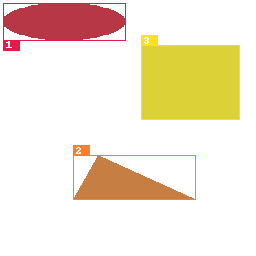

In [17]:
from PIL import Image
img = Image.open(f"./{exploring_image_id}.png")
img